In [156]:
import torch
torch.__version__
import timm
timm.__version__
import librosa
librosa.__version__


'0.10.1'

## `librosa`の使い方

### 1. laod

In [157]:
import librosa
from librosa.feature import melspectrogram
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


DATA_DIR=Path("/workdir/mount/data")

y,sr=librosa.load(DATA_DIR/"train_audio/asbfly/XC49755.ogg")

print(f"{y=}")
print(f"{len(y)=}")
print(f"{sr=}")

y=array([-4.16440287e-07, -1.76277911e-06,  2.85211229e-07, ...,
       -8.40442837e-04, -2.04714117e-04,  1.05749175e-04], dtype=float32)
len(y)=1162944
sr=22050


`librosa.load`の引数でもあり，返り値でもあるsrはsampling-rateの略称であり，

時間方向に対して連続な(デジタルな)音声データに対して，離散(アナログ)化する際の標本採取の間隔を示している．

In [158]:
y,sr=librosa.load(DATA_DIR/"train_audio/asbfly/XC134896.ogg")

print(f"{y=}")
print(f"{len(y)=}")
print(f"{sr=}")

y=array([ 1.1239055e-06, -3.5725856e-07, -2.4089284e-06, ...,
        4.8919164e-06, -3.7033487e-07,  0.0000000e+00], dtype=float32)
len(y)=603073
sr=22050


In [159]:
from IPython.display import Audio
Audio(DATA_DIR/"train_audio/asbfly/XC134896.ogg")

そのため，音声データの長さが異なれば，配列`y`の長さも異なる．

### 2. chromagram(~~使わないと思われる~~)

クロマグラムは音の周波数を大まかにクラスタ化(下の場合は音階で分けられている)し，その修験頻度を画像の濃淡で表している．

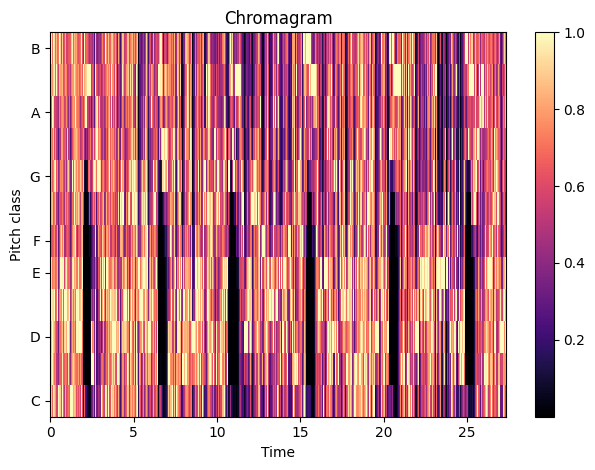

In [160]:
chromagram=librosa.feature.chroma_stft(y=y,sr=sr)

librosa.display.specshow(chromagram,x_axis="time",y_axis="chroma")
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

## Melspectrogram

上のグラフの縦軸がメル周波数に置き換わったもの．
メル周波数は人間の耳に聞こえ方を反映した周波数の変換方法で，

$$f(mel)=\frac{1000}{log_{10}2}log_{10}\left(\frac{f(Hz)}{1000}+1\right)$$

といった変換を行う．

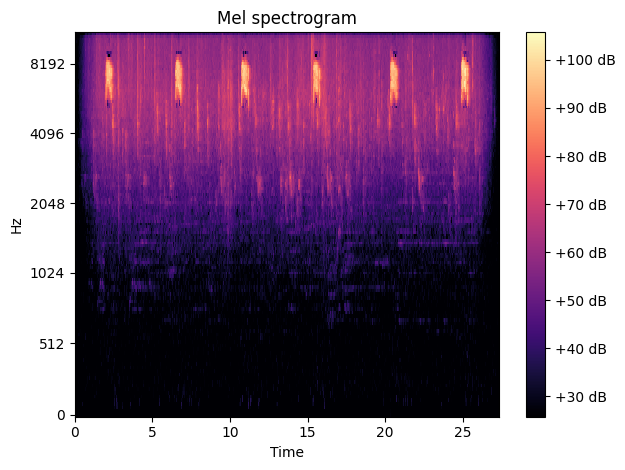

In [161]:
mel_spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.min)

librosa.display.specshow(mel_spectrogram_dB,x_axis="time",y_axis="mel",sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

## 3. MFCC

離散コサイン変換(?)を使うと得られる．離散コサイン変換については追々調べる．

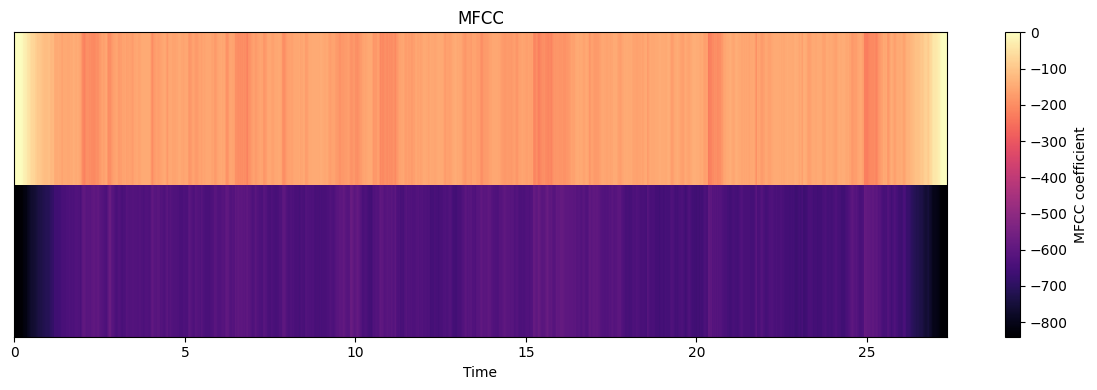

In [162]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(label='MFCC coefficient')
plt.title('MFCC')
plt.tight_layout()
plt.show()

## train_metadataの中身

In [163]:
import pandas as pd
pd.__version__

'2.2.1'

In [164]:
train_metadata_df=pd.read_csv(
    DATA_DIR/"train_metadata.csv"
)
display(train_metadata_df.head())
display(train_metadata_df.info())

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24459 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24459 non-null  object 
 1   secondary_labels  24459 non-null  object 
 2   type              24459 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24459 non-null  object 
 6   common_name       24459 non-null  object 
 7   author            24459 non-null  object 
 8   license           24459 non-null  object 
 9   rating            24459 non-null  float64
 10  url               24459 non-null  object 
 11  filename          24459 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB


None

## データローダーの作成

In [165]:
import torch
import torch.nn as nn
import torchvision.transforms.v2 as v2
from torch.utils.data import DataLoader,Dataset
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from typing import Any

In [166]:
train_metadata_df["primary_label"].values

array(['asbfly', 'asbfly', 'asbfly', ..., 'zitcis1', 'zitcis1', 'zitcis1'],
      dtype=object)

In [167]:
NUM_CLASSES=train_metadata_df["primary_label"].nunique()
print(NUM_CLASSES)

182


In [168]:
train_metadata_df["full_filename"]=train_metadata_df["filename"].apply(lambda x:DATA_DIR/f"train_audio/{x}")

### ラベル書き換え

文字列をラベルエンコーディング

In [169]:
encoder=LabelEncoder()
train_metadata_df["primary_label"]=encoder.fit_transform(train_metadata_df["primary_label"])

### train-test split

In [170]:
train_metadata_df,valid_metadata_df=train_test_split(train_metadata_df,test_size=1/6,shuffle=True)

In [171]:
class AudioDataset(Dataset):
    def __init__(self,labels,audio_paths,sampling_rate:int,transforms:v2.Compose=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])) -> None:
        
        self.labels=labels
        self.audio_paths=audio_paths
        self.sampling_rate=sampling_rate
        self.transforms=transforms
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index) -> Any:
        label=self.labels[index]
        audio_path=self.audio_paths[index]
        audio,_=librosa.load(audio_path)
        
        mel_spectrogram = librosa.feature.melspectrogram(y=audio,sr=self.sampling_rate)
        mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.min)
        
        image=self.transforms(mel_spectrogram_dB)
        return image,label
        
        
        
        

In [172]:
# train_set=AudioDataset(labels=train_metadata_df["primary_label"].values,audio_paths=train_metadata_df["full_filename"].values,sampling_rate=22050)
# valid_set=AudioDataset(labels=valid_metadata_df["primary_label"].values,audio_paths=valid_metadata_df["full_filename"].values,sampling_rate=22050)

In [173]:
# train_loader=DataLoader(train_set,batch_size=32,shuffle=True)
# valid_loader=DataLoader(valid_set,batch_size=32,shuffle=True)


## モデルのインスタンス

In [174]:
from timm.models import create_model
model=create_model("resnet18d",True)

## 訓練

とりあえず，画像をcropしたモデルを使う．

In [193]:
train_set = AudioDataset(
    labels=train_metadata_df["primary_label"].values,
    audio_paths=train_metadata_df["full_filename"].values,
    sampling_rate=22050,
    transforms=v2.Compose(
        [
            v2.Lambda(lambda x: np.stack([x] * 3, axis=-1)),
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Resize((112, 448)),
        ]
    ),
)


valid_set = AudioDataset(
    labels=valid_metadata_df["primary_label"].values,
    audio_paths=valid_metadata_df["full_filename"].values,
    sampling_rate=22050,
    transforms=v2.Compose(
        [
            v2.Lambda(lambda x: np.stack([x] * 3, dim=-1)),
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Resize((122, 448)),
        ]
    ),
)

In [194]:
train_loader=DataLoader(train_set,batch_size=32,shuffle=True)
valid_loader=DataLoader(valid_set,batch_size=32,shuffle=True)

In [195]:
from timm.scheduler import CosineLRScheduler
from timm.optim import AdamW
from torch.nn import CrossEntropyLoss

In [196]:
loss_fn=CrossEntropyLoss()
optim=AdamW(model.parameters())
lr=0.001

epochs=100

In [197]:
DEVICE=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=model.to(DEVICE)
for name, param in model.named_parameters():
    if "fc" not in name: 
        param.requires_grad = False

model.fc = nn.Linear(512, NUM_CLASSES) 

In [203]:
! nvidia-smi

Failed to initialize NVML: Unknown Error


In [198]:
from torchinfo import summary

In [199]:
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       (864)
│    └─BatchNorm2d: 2-2                  (64)
│    └─ReLU: 2-3                         --
│    └─Conv2d: 2-4                       (9,216)
│    └─BatchNorm2d: 2-5                  (64)
│    └─ReLU: 2-6                         --
│    └─Conv2d: 2-7                       (18,432)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─BasicBlock: 2-8                   --
│    │    └─Conv2d: 3-1                  (36,864)
│    │    └─BatchNorm2d: 3-2             (128)
│    │    └─Identity: 3-3                --
│    │    └─ReLU: 3-4                    --
│    │    └─Identity: 3-5                --
│    │    └─Conv2d: 3-6                  (36,864)
│    │    └─BatchNorm2d: 3-7       

In [200]:
from tqdm import tqdm


for epoch in tqdm(range(epochs)):
    model.train()
    
    for images, labels in enumerate(train_loader):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        
        loss=loss_fn(outputs,labels)
        loss.backward()
        print(f"{loss.item()=}")
        optim.step()
    
    

  0%|          | 0/100 [00:03<?, ?it/s]


AttributeError: 'int' object has no attribute 'to'